<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Space X  Falcon 9 First Stage Landing Prediction**


## Assignment:  Machine Learning Prediction


Estimated time needed: **60** minutes


Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.   In this lab, you will create a machine learning pipeline  to predict if the first stage will land given the data from the preceding labs.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planed. Space X; performs a controlled landing in the oceans.


## Objectives


Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

\-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test data


## Import Libraries and Define Auxiliary Functions


We will import the following libraries for the lab


In [217]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier
print("imported")

imported


This function is to plot the confusion matrix.


In [218]:
def plot_confusion_matrix(y,y_predict):
    #"this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, fmt='d', ax=ax)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 
    

## Load the dataframe


Load the data


In [219]:

URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
data = pd.read_csv(URL1)


In [220]:
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [221]:
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'

X = pd.read_csv(URL2).to_numpy()
type(X)

numpy.ndarray

In [222]:
X[0:5]

array([[1.00000000e+00, 6.10495941e+03, 1.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.000000

## TASK  1


Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).


In [223]:
type(data['Class'])

pandas.core.series.Series

In [224]:
Y = data['Class'].to_numpy()
Y[0:10]
Y.shape

(90,)

## TASK  2


Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.


In [225]:
transform = preprocessing.StandardScaler()
X = transform.fit_transform(X)

X[0:5]
X.shape

(90, 83)

We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


## TASK  3


Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.


<code>X_train, X_test, Y_train, Y_test</code>


In [226]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)


we can see we only have 18 test samples.


In [227]:
Y_test.shape


(18,)

## TASK  4


Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [228]:
#parameters ={'C':[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}

In [229]:
parameters = {"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression() # variable for logistic regression 
logreg_cv = GridSearchCV(cv=10, param_grid=parameters, estimator=lr) #creating the logreg_cv variable with GridSearchCV, CV 10, param_grid = parameters and estimator = lr
logreg_cv.fit(X_train, Y_train) #fitting the training set into the model
print(f"The best parameters: {logreg_cv.best_params_}") #best parameters
print(f"The best model score: {logreg_cv.score(X_train, Y_train)}") #best model score



The best parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
The best model score: 0.875


We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.


In [230]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_) #best parameters as above
print("accuracy :",logreg_cv.best_score_) #best accuracy using ".best_score_"


tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8464285714285713


## NOTE TO SELF
#### logreg_cv.score(X_train, Y_train): <span style="color:green"> Evaluates performance on the training set with the best parameters.
</span>.
#### logreg_cv.best_score_: <span style="color:green">Provides the mean cross-validated score of the best_estimator, giving an estimate of the model's generalization performance.</span>
#### Ideally, you would be interested in the *model's performance on unseen data, which is why the cross-validated score* (logreg_cv.best_score_) is often more  informative for assessing the model's generalization ability. The accuracy on the training set (logreg_cv.score(X_train, Y_train)) may be higher than the  cross-validated score, as the model has seen this data during training and could potentially overfit to it.

## TASK  5


Calculate the accuracy on the test data using the method <code>score</code>:


In [231]:
print(f"The best model accuracy score for test data: {logreg_cv.score(X_test, Y_test)}") #best model score


The best model accuracy score for test data: 0.8333333333333334


Lets look at the confusion matrix:


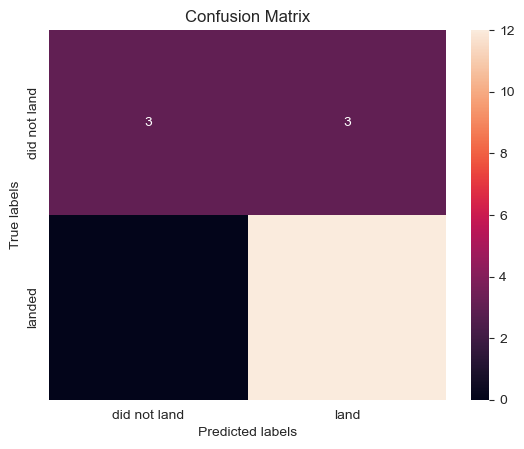

[1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 0 1]
[1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1]


In [232]:
yhat_lr=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat_lr)
print(Y_test)
print(yhat_lr)

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the major problem is false positives.


## TASK  6


Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv - 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [233]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [234]:
svm_cv = GridSearchCV(estimator=svm, param_grid=parameters, cv=10)
svm_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')})

In [235]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_) 
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
accuracy : 0.8482142857142856


## TASK  7


Calculate the accuracy on the test data using the method <code>score</code>:


In [236]:
print(f"The best model accuracy score for test data: {svm_cv.score(X_test, Y_test)}") #best model score

The best model accuracy score for test data: 0.8333333333333334


We can plot the confusion matrix


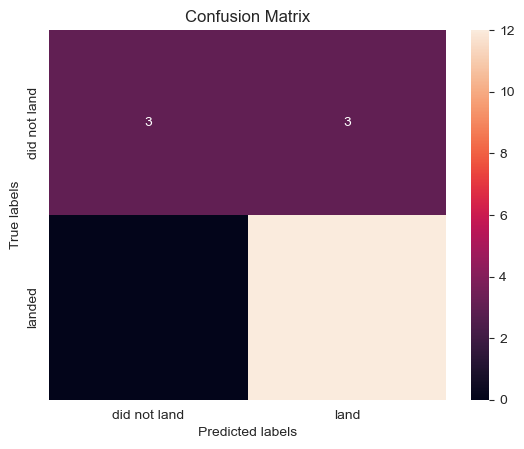

In [237]:
yhat_svm=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat_svm)

## TASK  8


Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [238]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [239]:
tree_cv = GridSearchCV(param_grid=parameters, estimator=tree, cv=10)
tree_cv.fit(X_train, Y_train)

C:\Users\SOL-1\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\SOL-1\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\SOL-1\anaconda3\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\SOL-1\anaconda3\Lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\SOL-1\anaconda3\Lib\site-pac

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [240]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
accuracy : 0.8767857142857144


## TASK  9


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


In [241]:
print(f"The best model accuracy score for test data: {tree_cv.score(X_test, Y_test)}") #best model score

The best model accuracy score for test data: 0.8333333333333334


We can plot the confusion matrix


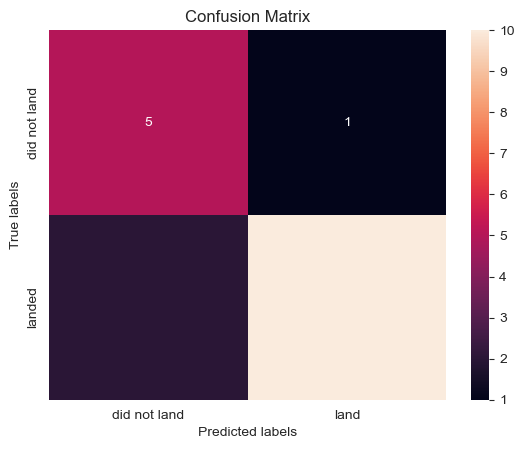

In [242]:
yhat_tree = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat_tree)

## TASK  10


Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [243]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [244]:
knn_cv = GridSearchCV(param_grid=parameters, estimator=KNN, cv=10)
knn_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [245]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
accuracy : 0.8482142857142858


## TASK  11


Calculate the accuracy of knn_cv on the test data using the method <code>score</code>:


In [246]:
print(f"The best model accuracy score for test data: {knn_cv.score(X_test, Y_test)}") #best model score

The best model accuracy score for test data: 0.8333333333333334


We can plot the confusion matrix


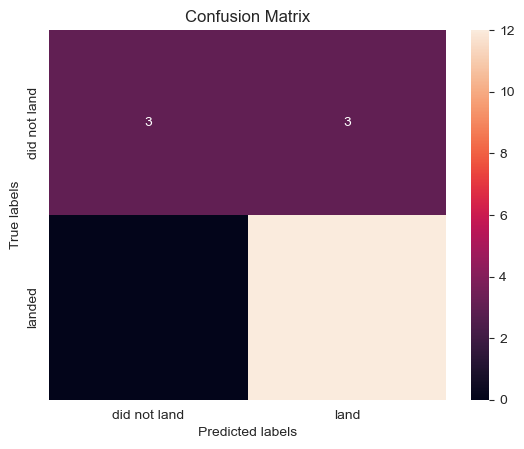

In [247]:
yhat_knn = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat_knn)

## TASK  12


Find the method performs best:


In [248]:
# log reg

print(f"The best model accuracy LR:,{logreg_cv.best_score_}") #training sets

print(f"The best model accuracy score LR for test data: {logreg_cv.score(X_test, Y_test)}")  #testing sets

# SVM
print(f"The best model accuracy SVM:,{svm_cv.best_score_}")
print(f"The best model accuracy score SVM for test data: {svm_cv.score(X_test, Y_test)}") #testing sets

#TREE 
print(f"The best model accuracy TREE :,{tree_cv.best_score_}") #trainingsets
print(f"The best model accuracy score TREE for test data: {tree_cv.score(X_test, Y_test)}") #testing sets

# KNN
print(f"The best model accuracy score KNN :,{knn_cv.best_score_}") #trainingsets
print(f"The best model accuracy score for test data: {knn_cv.score(X_test, Y_test)}") #testing sets


The best model accuracy LR:,0.8464285714285713
The best model accuracy score LR for test data: 0.8333333333333334
The best model accuracy SVM:,0.8482142857142856
The best model accuracy score SVM for test data: 0.8333333333333334
The best model accuracy TREE :,0.8767857142857144
The best model accuracy score TREE for test data: 0.8333333333333334
The best model accuracy score KNN :,0.8482142857142858
The best model accuracy score for test data: 0.8333333333333334


In [249]:
import pandas as pd

# Store results in a DataFrame
results = pd.DataFrame({
    'Algorithm': ['Logistic Regression', 'SVM', 'Decision Tree', 'KNN'],
    'Training Accuracy': [logreg_cv.best_score_, svm_cv.best_score_, tree_cv.best_score_, knn_cv.best_score_],
    'Test Accuracy': [logreg_cv.score(X_test, Y_test), svm_cv.score(X_test, Y_test), tree_cv.score(X_test, Y_test), knn_cv.score(X_test, Y_test)]
})

# Print the summary
print(results)


             Algorithm  Training Accuracy  Test Accuracy
0  Logistic Regression           0.846429       0.833333
1                  SVM           0.848214       0.833333
2        Decision Tree           0.876786       0.833333
3                  KNN           0.848214       0.833333


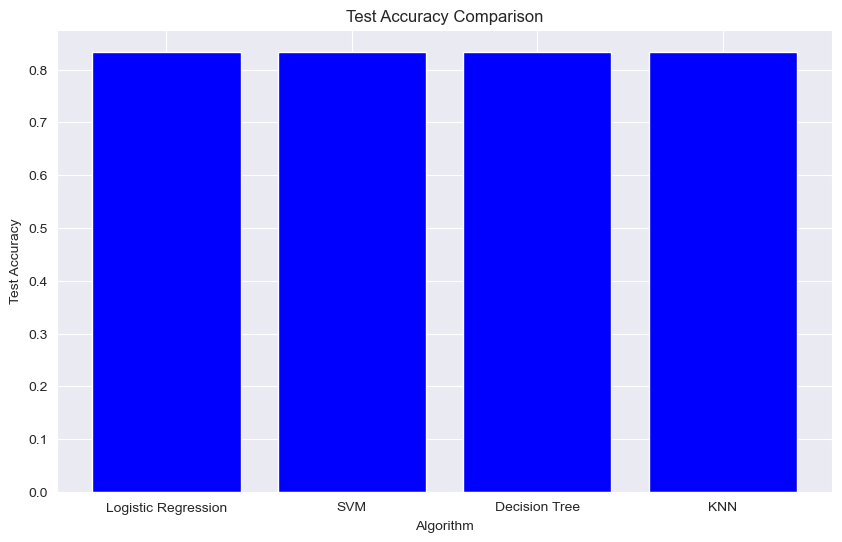

In [250]:
import matplotlib.pyplot as plt

# Plot test accuracy
plt.figure(figsize=(10, 6))
plt.bar(results['Algorithm'], results['Test Accuracy'], color='blue')
plt.title('Test Accuracy Comparison')
plt.xlabel('Algorithm')
plt.ylabel('Test Accuracy')
plt.show()


In [253]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score


# Logistic Regression
precision_lr = precision_score(Y_test, yhat_lr)
recall_lr = recall_score(Y_test, yhat_lr)
f1_lr = f1_score(Y_test, yhat_lr)
roc_auc_lr = roc_auc_score(Y_test, yhat_lr)

# SVM
precision_svm = precision_score(Y_test, yhat_svm)
recall_svm = recall_score(Y_test, yhat_svm)
f1_svm = f1_score(Y_test, yhat_svm)
roc_auc_svm = roc_auc_score(Y_test, yhat_svm)

# Decision Tree
precision_tree = precision_score(Y_test, yhat_tree)
recall_tree = recall_score(Y_test, yhat_tree)
f1_tree = f1_score(Y_test, yhat_tree)
roc_auc_tree = roc_auc_score(Y_test, yhat_tree)

# KNN
precision_knn = precision_score(Y_test, yhat_knn)
recall_knn = recall_score(Y_test, yhat_knn)
f1_knn = f1_score(Y_test, yhat_knn)
roc_auc_knn = roc_auc_score(Y_test, yhat_knn)

# Create a DataFrame to store metrics
metrics_df = pd.DataFrame({
    'Algorithm': ['Logistic Regression', 'SVM', 'Decision Tree', 'KNN'],
    'Precision': [precision_lr, precision_svm, precision_tree, precision_knn],
    'Recall': [recall_lr, recall_svm, recall_tree, recall_knn],
    'F1-Score': [f1_lr, f1_svm, f1_tree, f1_knn],
    'ROC AUC': [roc_auc_lr, roc_auc_svm, roc_auc_tree, roc_auc_knn]
})

# Print the metrics DataFrame
print(metrics_df)


             Algorithm  Precision    Recall  F1-Score   ROC AUC
0  Logistic Regression   0.800000  1.000000  0.888889  0.750000
1                  SVM   0.800000  1.000000  0.888889  0.750000
2        Decision Tree   0.909091  0.833333  0.869565  0.833333
3                  KNN   0.800000  1.000000  0.888889  0.750000


## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork865-2023-01-01)


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
